In [ ]:
# -*- coding:utf-8 -*-
'''
Created on 2020Âπ¥2Êúà15Êó•

@author: zfl
'''

In [39]:
#Â∞ÜÈúÄË¶ÅÁî®ÁöÑÂåÖÂØºÂÖ•
import pandas as pd
import numpy as np
import re
import nltk #pip install nltk
import os

In [41]:
#Êü•ÁúãÂΩìÂâçÁöÑÂ∑•‰ΩúË∑ØÂæÑ
os.getcwd() 

'D:\\graduate_student\\2020spring\\Ê°à‰æãÂ§ßËµõ\\lda'

# Êï¥‰ΩìËØ≠ÊñôÁöÑ‰∏ªÈ¢òËØçÊèêÂèñ

In [16]:
###ÊñáÊ°£‰ª•ÂàóË°®ÁöÑÂΩ¢ÂºèÂ≠òÂú®###
theme = pd.read_csv("../theme.csv",usecols = [1,3])
theme

news_title                                         news_theme
0              0  #‰ªäÂ§©ÊúâËØùËØ¥#„ÄêËÇñÊàò‰∫ã‰ª∂ÔºöÊ≤°ÊúâËÉúÂà©ËÄÖÁöÑÊàò‰∫â„ÄëÂæ∑ÂõΩÊÖïÂ∞ºÈªëÂ§ßÂ≠¶Ê≥ïÂ≠¶ÂçöÂ£´Âê¥‰∏ÄÂÖ¥Ë∞àÂèäËÇñÊàò#227Â§ßÂõ¢...
1              1  „Äê#ÊÑèÂ§ßÂà©Êñ∞Â¢û566‰æãÊñ∞ÂÜ†ËÇ∫ÁÇé# #ÊÑèÂ§ßÂà©Á¥ØËÆ°Á°ÆËØä1694‰æãÊñ∞ÂÜ†ËÇ∫ÁÇé#„ÄëÊ†πÊçÆÂΩìÂú∞Êó∂Èó¥3Êúà1Êó•...
2              2  „Äê#Ê≠¶Á£äÈÄ†‰πåÈæô# Ë•øÁè≠Áâô‰∫∫È¢ÜÂÖàÈ©¨Á´û„ÄëË•øÁè≠Áâô‰∫∫vsÈ©¨Âæ∑ÈáåÁ´ûÊäÄÁöÑÊØîËµõÁ¨¨24ÂàÜÈíüÔºåÊ≠¶Á£ä‰º†‰∏≠ÈÄ†ÊàêËê®Áª¥...
3              3     #‰∏äÊµ∑ËÄÅÊ¥ãÊàø##ÂÆâÂÆ∂#\nÊúâÈí±‰∫∫ÁöÑ‰∏ñÁïåÊ†πÊú¨ÊÉ≥Ë±°‰∏çÂà∞Ôºå1.5‰∫øÁöÑ‰∏äÊµ∑ËÄÅÊ¥ãÊàøÔºåÊàø‰ººÈî¶ÂæêÂßëÂßëÁªôÊàëÂÜ≤
4              4  „Äê#Ê∑±Âú≥Êñ∞Â¢ûÁî±Ëã±ÂõΩÈÄîÁªèÈ¶ôÊ∏ØËæìÂÖ•ÁóÖ‰æã#„ÄëÊçÆ‰∫∫Ê∞ëÊó•Êä•ËÆ∞ËÄÖË¥∫ÊûóÂπ≥Ôºå3Êúà1Êó•ÂáåÊô®ÔºåÊ∑±Âú≥Â∏ÇÂç´ÁîüÂÅ•Â∫∑ÂßîÊä•...
...          ...                                                ...
1625        1649  #Ê∞ëÊ∞ëÂ∞èË∞ÉÊü•#„Äê#Â¶Ç‰ΩïÁúãÂæÖÂ•≥ÂéïËÆæÁî∑Á´•Â∞è‰æøÊ±†#Ôºü„Äë‰∏∫‰∫ÜÊñπ‰æøÂ∏¶Â≠©Â≠êÁöÑÊØç‰∫≤ÔºåÊù≠Â∑ûÂ∏ÇÁ¨¨‰∏Ä‰∫∫Ê∞ëÂåªÈô¢Âú®Â•≥...
1626        1650  „Äê#Â¢ÉÂÜÖÁ°ÆËØä217‰æãÊñ∞ÂûãÂÜ†Áä∂ÁóÖÊØíËÇ∫ÁÇéÁóÖ‰æã#„ÄëÊà™Ëá≥‰ªäÊó•18Êó∂ÔºåÊàëÂõΩÂ¢ÉÂÜÖÁ¥ØËÆ°Êä•ÂëäÊñ∞ÂûãÂÜ†Áä∂ÁóÖÊØíÊÑüÊüì...
1627        1651  ÈíüÂçóÂ±±Èô¢Â£´‰ªäÂπ¥83Â≤Å‰∫ÜÔºåËßÜÈ¢ëÈáåÊ†πÊú¨Áúã‰∏çÂá∫Êù•ÔºÅ‰Ω†Áü•ÈÅìÂêóÔºåÈíüÂçóÂ±±Èô¢Â£´Â∏∏Âπ¥ÂùöÊåÅËøêÂä®ÔºåÊõæÂú®1959Âπ¥...
1628        1653  #ÊÉ≥ËßÅ‰Ω†‰∏ªÊºîÈáçÂõûÊãçÊëÑÂú∞# 9Êó•ÊôöÔºå@ÊñΩÊüèÂÆápatrick ÊôíÂá∫‰∏é@Ë®±ÂÖâÊº¢GregHan @ÊüØ...
1629        1654  „ÄêÈíüÂçóÂ±±ÔºöÊñ∞ÂûãÂÜ†Áä∂ÁóÖÊØí‰º†ÊüìÊÄß‰∏éSARSÂ¶Ç‰ΩïÊØîËæÉÔºü„ÄëÈíüÂçóÂ±±ÔºöÊñ∞ÂûãÂÜ†Áä∂ÁóÖÊØíË∑üSARSÁóÖÊØíÁõ∏ÊØîÔºåÂ∞Ω...

[1630 rows x 2 columns]

##  Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜ

In [23]:
theme=theme.dropna()#ÂéªÈô§Áº∫Â§±ÂÄº

In [62]:
#Â∞ÜÁâπÊÆäÁ¨¶Âè∑ÂéªÈô§
import re
import warnings
warnings.filterwarnings("ignore")
r1 = '[a-zA-Z0-9‚Äô!"#$%&\'()*+,-./:Ôºö\n;<=>?@Ôºå„ÄÇ?‚òÖ„ÄÅ‚Ä¶„Äê„Äë„Ö†„Ö†⁄°‡πë„Ää„ÄãÔºü‚Äú‚Äù‚Äò‚ÄôÔºÅ[\\]^_`{|}~]+'
theme['clean_text'] = ''
text_len = theme.shape[0]
for i in range(text_len):
    a = re.sub(r1,'',theme.iloc[i,1])
    theme.iloc[i,2] = a

In [63]:
for i in range(text_len):
    theme.iloc[i,2]= re.sub("[A-Za-z0-9\[\`\~\!\@\#\$\^\&\*\(\)\=\|\{\}\'\:\;\'\,\[\]\.\<\>\/\?\~\ÔºÅ\@\#\\\&\*\%]"," ",theme.iloc[i,2])

In [64]:
theme

news_title                                         news_theme  \
0              0  #‰ªäÂ§©ÊúâËØùËØ¥#„ÄêËÇñÊàò‰∫ã‰ª∂ÔºöÊ≤°ÊúâËÉúÂà©ËÄÖÁöÑÊàò‰∫â„ÄëÂæ∑ÂõΩÊÖïÂ∞ºÈªëÂ§ßÂ≠¶Ê≥ïÂ≠¶ÂçöÂ£´Âê¥‰∏ÄÂÖ¥Ë∞àÂèäËÇñÊàò#227Â§ßÂõ¢...   
1              1  „Äê#ÊÑèÂ§ßÂà©Êñ∞Â¢û566‰æãÊñ∞ÂÜ†ËÇ∫ÁÇé# #ÊÑèÂ§ßÂà©Á¥ØËÆ°Á°ÆËØä1694‰æãÊñ∞ÂÜ†ËÇ∫ÁÇé#„ÄëÊ†πÊçÆÂΩìÂú∞Êó∂Èó¥3Êúà1Êó•...   
2              2  „Äê#Ê≠¶Á£äÈÄ†‰πåÈæô# Ë•øÁè≠Áâô‰∫∫È¢ÜÂÖàÈ©¨Á´û„ÄëË•øÁè≠Áâô‰∫∫vsÈ©¨Âæ∑ÈáåÁ´ûÊäÄÁöÑÊØîËµõÁ¨¨24ÂàÜÈíüÔºåÊ≠¶Á£ä‰º†‰∏≠ÈÄ†ÊàêËê®Áª¥...   
3              3     #‰∏äÊµ∑ËÄÅÊ¥ãÊàø##ÂÆâÂÆ∂#\nÊúâÈí±‰∫∫ÁöÑ‰∏ñÁïåÊ†πÊú¨ÊÉ≥Ë±°‰∏çÂà∞Ôºå1.5‰∫øÁöÑ‰∏äÊµ∑ËÄÅÊ¥ãÊàøÔºåÊàø‰ººÈî¶ÂæêÂßëÂßëÁªôÊàëÂÜ≤   
4              4  „Äê#Ê∑±Âú≥Êñ∞Â¢ûÁî±Ëã±ÂõΩÈÄîÁªèÈ¶ôÊ∏ØËæìÂÖ•ÁóÖ‰æã#„ÄëÊçÆ‰∫∫Ê∞ëÊó•Êä•ËÆ∞ËÄÖË¥∫ÊûóÂπ≥Ôºå3Êúà1Êó•ÂáåÊô®ÔºåÊ∑±Âú≥Â∏ÇÂç´ÁîüÂÅ•Â∫∑ÂßîÊä•...   
...          ...                                                ...   
1625        1649  #Ê∞ëÊ∞ëÂ∞èË∞ÉÊü•#„Äê#Â¶Ç‰ΩïÁúãÂæÖÂ•≥ÂéïËÆæÁî∑Á´•Â∞è‰æøÊ±†#Ôºü„Äë‰∏∫‰∫ÜÊñπ‰æøÂ∏¶Â≠©Â≠êÁöÑÊØç‰∫≤ÔºåÊù≠Â∑ûÂ∏ÇÁ¨¨‰∏Ä‰∫∫Ê∞ëÂåªÈô¢Âú®Â•≥...   
1626        1650  „Äê#Â¢ÉÂÜÖÁ°ÆËØä217‰æãÊñ∞ÂûãÂÜ†Áä∂ÁóÖÊØíËÇ∫ÁÇéÁóÖ‰æã#„ÄëÊà™Ëá≥‰ªäÊó•18Êó∂ÔºåÊàëÂõΩÂ¢ÉÂÜÖÁ¥ØËÆ°Êä•ÂëäÊñ∞ÂûãÂÜ†Áä∂ÁóÖÊØíÊÑüÊüì...   
1627        1651  ÈíüÂçóÂ±±Èô¢Â£´‰ªäÂπ¥83Â≤Å‰∫ÜÔºåËßÜÈ¢ëÈáåÊ†πÊú¨Áúã‰∏çÂá∫Êù•ÔºÅ‰Ω†Áü•ÈÅìÂêóÔºåÈíüÂçóÂ±±Èô¢Â£´Â∏∏Âπ¥ÂùöÊåÅËøêÂä®ÔºåÊõæÂú®1959Âπ¥...   
1628        1653  #ÊÉ≥ËßÅ‰Ω†‰∏ªÊºîÈáçÂõûÊãçÊëÑÂú∞# 9Êó•ÊôöÔºå@ÊñΩÊüèÂÆápatrick ÊôíÂá∫‰∏é@Ë®±ÂÖâÊº¢GregHan @ÊüØ...   
1629        1654  „ÄêÈíüÂçóÂ±±ÔºöÊñ∞ÂûãÂÜ†Áä∂ÁóÖÊØí‰º†ÊüìÊÄß‰∏éSARSÂ¶Ç‰ΩïÊØîËæÉÔºü„ÄëÈíüÂçóÂ±±ÔºöÊñ∞ÂûãÂÜ†Áä∂ÁóÖÊØíË∑üSARSÁóÖÊØíÁõ∏ÊØîÔºåÂ∞Ω...   

                                             clean_text  
0     ‰ªäÂ§©ÊúâËØùËØ¥ËÇñÊàò‰∫ã‰ª∂Ê≤°ÊúâËÉúÂà©ËÄÖÁöÑÊàò‰∫âÂæ∑ÂõΩÊÖïÂ∞ºÈªëÂ§ßÂ≠¶Ê≥ïÂ≠¶ÂçöÂ£´Âê¥‰∏ÄÂÖ¥Ë∞àÂèäËÇñÊàòÂ§ßÂõ¢Áªì‰∫ã‰ª∂Êó∂Ë°®Á§∫ËÇñÊàòÊú¨...  
1     ÊÑèÂ§ßÂà©Êñ∞Â¢û‰æãÊñ∞ÂÜ†ËÇ∫ÁÇé ÊÑèÂ§ßÂà©Á¥ØËÆ°Á°ÆËØä‰æãÊñ∞ÂÜ†ËÇ∫ÁÇéÊ†πÊçÆÂΩìÂú∞Êó∂Èó¥ÊúàÊó•Êó∂ÊÑèÂ§ßÂà©Âç´ÁîüÈÉ®ÂÖ¨Â∏ÉÁöÑÊúÄËøëÊï∞ÊçÆÊÑè...  
2     Ê≠¶Á£äÈÄ†‰πåÈæô Ë•øÁè≠Áâô‰∫∫È¢ÜÂÖàÈ©¨Á´ûË•øÁè≠Áâô‰∫∫È©¨Âæ∑ÈáåÁ´ûÊäÄÁöÑÊØîËµõÁ¨¨ÂàÜÈíüÊ≠¶Á£ä‰º†‰∏≠ÈÄ†ÊàêËê®Áª¥Â•áÊâìËøõ‰πåÈæôË•øÁè≠Áâô‰∫∫...  
3                   ‰∏äÊµ∑ËÄÅÊ¥ãÊàøÂÆâÂÆ∂ÊúâÈí±‰∫∫ÁöÑ‰∏ñÁïåÊ†πÊú¨ÊÉ≥Ë±°‰∏çÂà∞‰∫øÁöÑ‰∏äÊµ∑ËÄÅÊ¥ãÊàøÊàø‰ººÈî¶ÂæêÂßëÂßëÁªôÊàëÂÜ≤  
4     Ê∑±Âú≥Êñ∞Â¢ûÁî±Ëã±ÂõΩÈÄîÁªèÈ¶ôÊ∏ØËæìÂÖ•ÁóÖ‰æãÊçÆ‰∫∫Ê∞ëÊó•Êä•ËÆ∞ËÄÖË¥∫ÊûóÂπ≥ÊúàÊó•ÂáåÊô®Ê∑±Âú≥Â∏ÇÂç´ÁîüÂÅ•Â∫∑ÂßîÊä•Âëä‰æãÂ¢ÉÂ§ñËæìÂÖ•Êñ∞ÂÜ†...  
...                                                 ...  
1625  Ê∞ëÊ∞ëÂ∞èË∞ÉÊü•Â¶Ç‰ΩïÁúãÂæÖÂ•≥ÂéïËÆæÁî∑Á´•Â∞è‰æøÊ±†‰∏∫‰∫ÜÊñπ‰æøÂ∏¶Â≠©Â≠êÁöÑÊØç‰∫≤Êù≠Â∑ûÂ∏ÇÁ¨¨‰∏Ä‰∫∫Ê∞ëÂåªÈô¢Âú®Â•≥ÂéïÊâÄÈó®Âè£ËÆæÁΩÆ‰∫Ü‰∏Ä...  
1626  Â¢ÉÂÜÖÁ°ÆËØä‰æãÊñ∞ÂûãÂÜ†Áä∂ÁóÖÊØíËÇ∫ÁÇéÁóÖ‰æãÊà™Ëá≥‰ªäÊó•Êó∂ÊàëÂõΩÂ¢ÉÂÜÖÁ¥ØËÆ°Êä•ÂëäÊñ∞ÂûãÂÜ†Áä∂ÁóÖÊØíÊÑüÊüìÁöÑËÇ∫ÁÇéÁóÖ‰æã‰æãÂÖ∂‰∏≠Á°ÆËØä...  
1627  ÈíüÂçóÂ±±Èô¢Â£´‰ªäÂπ¥Â≤Å‰∫ÜËßÜÈ¢ëÈáåÊ†πÊú¨Áúã‰∏çÂá∫Êù•‰Ω†Áü•ÈÅìÂêóÈíüÂçóÂ±±Èô¢Â£´Â∏∏Âπ¥ÂùöÊåÅËøêÂä®ÊõæÂú®Âπ¥ÊúàÁöÑÈ¶ñÂ±äÂÖ®Ëøê‰ºö‰∏ä‰ª•Áßí...  
1628  ÊÉ≥ËßÅ‰Ω†‰∏ªÊºîÈáçÂõûÊãçÊëÑÂú∞ Êó•ÊôöÊñΩÊüèÂÆá ÊôíÂá∫‰∏éË®±ÂÖâÊº¢ ÊüØ‰Ω≥Â¨ø ‰∏ÄËµ∑ÈáçÂõûÊÉ≥ËßÅ‰Ω†ÊãçÊëÑÂú∞ÁöÑÂêàÁÖß‰∏ÄÂπ¥‰∫ÜÂõûÂà∞...  
1629  ÈíüÂçóÂ±±Êñ∞ÂûãÂÜ†Áä∂ÁóÖÊØí‰º†ÊüìÊÄß‰∏éÂ¶Ç‰ΩïÊØîËæÉÈíüÂçóÂ±±Êñ∞ÂûãÂÜ†Áä∂ÁóÖÊØíË∑üÁóÖÊØíÁõ∏ÊØîÂ∞ΩÁÆ°ÊúâÂæàÂ§öÁöÑÂêåÊ∫êÊÄß‰ΩÜÊòØÊòØÂπ≥Ë°åÁöÑ...  

[1629 rows x 3 columns]

In [96]:
#ÂÅúÁî®ËØçËé∑Âèñ
stopwords1= [line.rstrip() for line in open('‰∏≠ÊñáÂÅúÁî®ËØçË°®.txt', 'r', encoding='utf-8')]
stopwords2= [line.rstrip() for line in open('ÂìàÂ∑•Â§ßÂÅúÁî®ËØçË°®.txt', 'r', encoding='utf-8')]
stopwords3 = [line.rstrip() for line in open('ÂõõÂ∑ùÂ§ßÂ≠¶Êú∫Âô®Êô∫ËÉΩÂÆûÈ™åÂÆ§ÂÅúÁî®ËØçÂ∫ì.txt', 'r', encoding='utf-8')]
stopwords = stopwords1 + stopwords2 + stopwords3

In [100]:
stopwords = stopwords+['ÂÖ®Êñá','Â±ïÂºÄ']

In [101]:
# ÂÆö‰πâÂàÜËØçÂíåÂÅúÁî®ËØçÂéªÈô§ÁöÑÂáΩÊï∞
import jieba
from bs4 import BeautifulSoup
ch_stopwords = set(stopwords)
def clean_Ctext(text):
    text = BeautifulSoup(text,'html.parser').get_text()
    words = text.split()
    words = [w for w in words if w not in ch_stopwords] #Â¶ÇÊûúÊúâÈúÄË¶Å‰∏≠ÊñáÂÅúÁî®ËØçÔºåË¶ÅËá™Â∑±Âéª‰∏ã
    return ' '.join(words)
def split_sentences(review):
    raw_sentences = jieba.cut(review,cut_all = True)
    sentences = [clean_Ctext(s) for s in raw_sentences if s]
    return ' '.join(sentences)
# Á¨¨‰∏âÊ≠•ÔºöÂêëÈáèÂåñÂáΩÊï∞ÂíåË∞ÉÁî®ÂáΩÊï∞
# ÂêëÈáèÂåñÂáΩÊï∞,ÂΩìËæìÂÖ•‰∏Ä‰∏™ÂàóË°®Êó∂ÔºåÂàóË°®ÈáåÁöÑÊï∞Â∞ÜË¢´‰∏Ä‰∏™‰∏Ä‰∏™ËæìÂÖ•ÔºåÊúÄÂêéËøîÂõû‰πüÊòØ‰∏Ä‰∏™‰∏™ÂàóË°®ÁöÑËæìÂá∫
theme['clean_text'] = theme.clean_text.apply(split_sentences)
# Ë∞ÉÁî®ÂáΩÊï∞ËøõË°åÂàÜËØçÂíåÂéªÈô§ÂÅúÁî®ËØç

In [102]:
##ÊúÄÂêé‰∏ÄÂÆöË¶ÅÊòØËøôÁßçÂΩ¢ÂºèÁöÑ###
theme

news_title                                         news_theme  \
0              0  #‰ªäÂ§©ÊúâËØùËØ¥#„ÄêËÇñÊàò‰∫ã‰ª∂ÔºöÊ≤°ÊúâËÉúÂà©ËÄÖÁöÑÊàò‰∫â„ÄëÂæ∑ÂõΩÊÖïÂ∞ºÈªëÂ§ßÂ≠¶Ê≥ïÂ≠¶ÂçöÂ£´Âê¥‰∏ÄÂÖ¥Ë∞àÂèäËÇñÊàò#227Â§ßÂõ¢...   
1              1  „Äê#ÊÑèÂ§ßÂà©Êñ∞Â¢û566‰æãÊñ∞ÂÜ†ËÇ∫ÁÇé# #ÊÑèÂ§ßÂà©Á¥ØËÆ°Á°ÆËØä1694‰æãÊñ∞ÂÜ†ËÇ∫ÁÇé#„ÄëÊ†πÊçÆÂΩìÂú∞Êó∂Èó¥3Êúà1Êó•...   
2              2  „Äê#Ê≠¶Á£äÈÄ†‰πåÈæô# Ë•øÁè≠Áâô‰∫∫È¢ÜÂÖàÈ©¨Á´û„ÄëË•øÁè≠Áâô‰∫∫vsÈ©¨Âæ∑ÈáåÁ´ûÊäÄÁöÑÊØîËµõÁ¨¨24ÂàÜÈíüÔºåÊ≠¶Á£ä‰º†‰∏≠ÈÄ†ÊàêËê®Áª¥...   
3              3     #‰∏äÊµ∑ËÄÅÊ¥ãÊàø##ÂÆâÂÆ∂#\nÊúâÈí±‰∫∫ÁöÑ‰∏ñÁïåÊ†πÊú¨ÊÉ≥Ë±°‰∏çÂà∞Ôºå1.5‰∫øÁöÑ‰∏äÊµ∑ËÄÅÊ¥ãÊàøÔºåÊàø‰ººÈî¶ÂæêÂßëÂßëÁªôÊàëÂÜ≤   
4              4  „Äê#Ê∑±Âú≥Êñ∞Â¢ûÁî±Ëã±ÂõΩÈÄîÁªèÈ¶ôÊ∏ØËæìÂÖ•ÁóÖ‰æã#„ÄëÊçÆ‰∫∫Ê∞ëÊó•Êä•ËÆ∞ËÄÖË¥∫ÊûóÂπ≥Ôºå3Êúà1Êó•ÂáåÊô®ÔºåÊ∑±Âú≥Â∏ÇÂç´ÁîüÂÅ•Â∫∑ÂßîÊä•...   
...          ...                                                ...   
1625        1649  #Ê∞ëÊ∞ëÂ∞èË∞ÉÊü•#„Äê#Â¶Ç‰ΩïÁúãÂæÖÂ•≥ÂéïËÆæÁî∑Á´•Â∞è‰æøÊ±†#Ôºü„Äë‰∏∫‰∫ÜÊñπ‰æøÂ∏¶Â≠©Â≠êÁöÑÊØç‰∫≤ÔºåÊù≠Â∑ûÂ∏ÇÁ¨¨‰∏Ä‰∫∫Ê∞ëÂåªÈô¢Âú®Â•≥...   
1626        1650  „Äê#Â¢ÉÂÜÖÁ°ÆËØä217‰æãÊñ∞ÂûãÂÜ†Áä∂ÁóÖÊØíËÇ∫ÁÇéÁóÖ‰æã#„ÄëÊà™Ëá≥‰ªäÊó•18Êó∂ÔºåÊàëÂõΩÂ¢ÉÂÜÖÁ¥ØËÆ°Êä•ÂëäÊñ∞ÂûãÂÜ†Áä∂ÁóÖÊØíÊÑüÊüì...   
1627        1651  ÈíüÂçóÂ±±Èô¢Â£´‰ªäÂπ¥83Â≤Å‰∫ÜÔºåËßÜÈ¢ëÈáåÊ†πÊú¨Áúã‰∏çÂá∫Êù•ÔºÅ‰Ω†Áü•ÈÅìÂêóÔºåÈíüÂçóÂ±±Èô¢Â£´Â∏∏Âπ¥ÂùöÊåÅËøêÂä®ÔºåÊõæÂú®1959Âπ¥...   
1628        1653  #ÊÉ≥ËßÅ‰Ω†‰∏ªÊºîÈáçÂõûÊãçÊëÑÂú∞# 9Êó•ÊôöÔºå@ÊñΩÊüèÂÆápatrick ÊôíÂá∫‰∏é@Ë®±ÂÖâÊº¢GregHan @ÊüØ...   
1629        1654  „ÄêÈíüÂçóÂ±±ÔºöÊñ∞ÂûãÂÜ†Áä∂ÁóÖÊØí‰º†ÊüìÊÄß‰∏éSARSÂ¶Ç‰ΩïÊØîËæÉÔºü„ÄëÈíüÂçóÂ±±ÔºöÊñ∞ÂûãÂÜ†Áä∂ÁóÖÊØíË∑üSARSÁóÖÊØíÁõ∏ÊØîÔºåÂ∞Ω...   

                                             clean_text  
0     ‰ªäÂ§©   ËØù  ËØ¥  ËÇñ  Êàò‰∫ã  ‰∫ã‰ª∂   ËÉúÂà©  ËÉúÂà© ËÉúÂà©ËÄÖ   Êàò‰∫â  Âæ∑ÂõΩ  Âæ∑ÂõΩ...  
1     ÊÑèÂ§ßÂà© Â§ßÂà©  Â§ßÂà©  Êñ∞Â¢û  ‰æã  Êñ∞  ÂÜ†  ËÇ∫ÁÇé   ÊÑèÂ§ßÂà© Â§ßÂà©  Â§ßÂà©  Á¥ØËÆ°  ...  
2     Ê≠¶  Á£ä  ÈÄ†  ‰πåÈæô   Ë•øÁè≠Áâô  Ë•øÁè≠Áâô Ë•øÁè≠Áâô‰∫∫  È¢ÜÂÖà  È©¨  Á´û  Ë•øÁè≠Áâô  Ë•øÁè≠...  
3     ‰∏äÊµ∑  ËÄÅÊ¥ãÊàø Ê¥ãÊàø  Ê¥ãÊàø  ÂÆâÂÆ∂  ÊúâÈí±  ÊúâÈí± ÊúâÈí±‰∫∫   ‰∏ñÁïå  Ê†πÊú¨  ÊÉ≥Ë±°  ‰∏ç...  
4     Ê∑±Âú≥  Êñ∞Â¢û   Ëã±ÂõΩ  ÈÄîÁªè  È¶ôÊ∏Ø  ËæìÂÖ•  ÁóÖ‰æã   ‰∫∫Ê∞ë  ‰∫∫Ê∞ë ‰∫∫Ê∞ëÊó•Êä• Êó•Êä•  ...  
...                                                 ...  
1625  Ê∞ë  Ê∞ë  Â∞èË∞É  Ë∞ÉÊü•   ÁúãÂæÖ  Â•≥Âéï  ËÆæ  Áî∑Á´•  Â∞è‰æø  Â∞è‰æø Â∞è‰æøÊ±† ‰æøÊ±†  ‰æø...  
1626  Â¢ÉÂÜÖ  Á°ÆËØä  ‰æã  Êñ∞Âûã  ÂÜ†Áä∂  ÂÜ†Áä∂ ÂÜ†Áä∂ÁóÖÊØí ÁóÖÊØí  ÁóÖÊØí  ËÇ∫ÁÇé  ÁóÖ‰æã    ‰ªä...  
1627  ÈíüÂçóÂ±± ÂçóÂ±±  ÂçóÂ±±  Èô¢Â£´  ‰ªäÂπ¥  Âπ¥Â≤Å   ËßÜÈ¢ë  ÈáåÊ†π  Ê†πÊú¨  Áúã‰∏çÂá∫ ‰∏çÂá∫  Áúã...  
1628  ÊÉ≥ËßÅ   ‰∏ªÊºî  ÈáçÂõû  ÊãçÊëÑ  ÊãçÊëÑ ÊãçÊëÑÂú∞   Êó•  Êôö  ÊñΩ  Êüè  ÂÆá   Êôí  Âá∫...  
1629  ÈíüÂçóÂ±± ÂçóÂ±±  ÂçóÂ±±  Êñ∞Âûã  ÂÜ†Áä∂  ÂÜ†Áä∂ ÂÜ†Áä∂ÁóÖÊØí ÁóÖÊØí  ÁóÖÊØí  ‰º†Êüì  ‰º†Êüì ‰º†ÊüìÊÄß...  

[1629 rows x 3 columns]

In [577]:
# Á¨¨ÂõõÊ≠•Ôºö‰ΩøÁî®TfidVectorizerËøõË°åTF-idfËØçË¢ãÊ®°ÂûãÁöÑÊûÑÂª∫
from sklearn.feature_extraction.text import TfidfVectorizer
Tf = TfidfVectorizer(use_idf=True)
Tf.fit(theme.clean_text)
vocs = Tf.get_feature_names()
corpus_array = Tf.transform(theme.clean_text).toarray()
corpus_norm_df = pd.DataFrame(corpus_array, columns=vocs)
corpus_norm_df

·¥õ Ä  ·¥õ Ä·¥Ä·¥Ñ·¥ã  ·¥õ Ä·¥Ä·¥Ñ·¥ãùü∂ùü∑ùü∑ùüπ·¥õ Ä·¥Ä·¥Ñ·¥ã   ‰∏Ä‰∏á  ‰∏Ä‰∏áÂ§ö  ‰∏Ä‰∏áÂ§öÂêç   ‰∏Ä‰∏à   ‰∏Ä‰∏ä   ‰∏Ä‰∏ã  ‰∏Ä‰∏ãÂ≠ê  ...  \
0     0.0    0.0             0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...   
1     0.0    0.0             0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...   
2     0.0    0.0             0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...   
3     0.0    0.0             0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...   
4     0.0    0.0             0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...   
...   ...    ...             ...  ...  ...   ...  ...  ...  ...  ...  ...   
1624  0.0    0.0             0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...   
1625  0.0    0.0             0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...   
1626  0.0    0.0             0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...   
1627  0.0    0.0             0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...   
1628  0.0    0.0             0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...   

       ÈæôÊ∏Ø   ÈæôËôæ  ÈæôÈÄÜÂ§©  ùêÉùêÄùêò  ùóõùóºùóΩùó≤ùóπùó≤ùòÄùòÄ  ùó•ùóºùó∫ùóÆùóªùòÅùó∂ùó∞   ùü∂ùü∑   ùü∂ùü∏   ùü∂ùüπ   ùü∂ùü∫  
0     0.0  0.0  0.0  0.0       0.0       0.0  0.0  0.0  0.0  0.0  
1     0.0  0.0  0.0  0.0       0.0       0.0  0.0  0.0  0.0  0.0  
2     0.0  0.0  0.0  0.0       0.0       0.0  0.0  0.0  0.0  0.0  
3     0.0  0.0  0.0  0.0       0.0       0.0  0.0  0.0  0.0  0.0  
4     0.0  0.0  0.0  0.0       0.0       0.0  0.0  0.0  0.0  0.0  
...   ...  ...  ...  ...       ...       ...  ...  ...  ...  ...  
1624  0.0  0.0  0.0  0.0       0.0       0.0  0.0  0.0  0.0  0.0  
1625  0.0  0.0  0.0  0.0       0.0       0.0  0.0  0.0  0.0  0.0  
1626  0.0  0.0  0.0  0.0       0.0       0.0  0.0  0.0  0.0  0.0  
1627  0.0  0.0  0.0  0.0       0.0       0.0  0.0  0.0  0.0  0.0  
1628  0.0  0.0  0.0  0.0       0.0       0.0  0.0  0.0  0.0  0.0  

[1629 rows x 13717 columns]

## ÊûÑÂª∫LDA‰∏ªÈ¢òÊ®°Âûã

In [104]:
# Á¨¨‰∫îÊ≠•ÔºöÊûÑÂª∫LDA‰∏ªÈ¢òÊ®°Âûã
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=2, max_iter=500, random_state=42)
LDA_corpus = np.array(LDA.fit_transform(corpus_array))
LDA_corpus

array([[0.92264182, 0.07735818],
       [0.87946609, 0.12053391],
       [0.13956906, 0.86043094],
       ...,
       [0.84031734, 0.15968266],
       [0.8694656 , 0.1305344 ],
       [0.89853699, 0.10146301]])

In [578]:
#‰∏ÄÂÖ±Êúâ5‰∏™‰∏ªÈ¢ò
LDA_corpus.shape

(1629, 2)

‰ªéLDAÁöÑ‰∏ªÈ¢òÂàÜÁ±ªÁªìÊûú‰∏≠ÊåëÂá∫ÂÖ≥‰∫éÁñ´ÊÉÖÁöÑ‰∏ªÈ¢òÔºåÂÜçËøõË°å‰∏ªÈ¢òËØçÁöÑÊèêÂèñ

In [579]:
LDA_corpus_one = np.zeros([LDA_corpus.shape[0]])
corpus_norm_df['LDA_labels'] = LDA_corpus.argmax(axis=1)
corpus_norm_df.head()

·¥õ Ä  ·¥õ Ä·¥Ä·¥Ñ·¥ã  ·¥õ Ä·¥Ä·¥Ñ·¥ãùü∂ùü∑ùü∑ùüπ·¥õ Ä·¥Ä·¥Ñ·¥ã   ‰∏Ä‰∏á  ‰∏Ä‰∏áÂ§ö  ‰∏Ä‰∏áÂ§öÂêç   ‰∏Ä‰∏à   ‰∏Ä‰∏ä   ‰∏Ä‰∏ã  ‰∏Ä‰∏ãÂ≠ê  ...   ÈæôËôæ  \
0  0.0    0.0             0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...  0.0   
1  0.0    0.0             0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...  0.0   
2  0.0    0.0             0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...  0.0   
3  0.0    0.0             0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...  0.0   
4  0.0    0.0             0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...  0.0   

   ÈæôÈÄÜÂ§©  ùêÉùêÄùêò  ùóõùóºùóΩùó≤ùóπùó≤ùòÄùòÄ  ùó•ùóºùó∫ùóÆùóªùòÅùó∂ùó∞   ùü∂ùü∑   ùü∂ùü∏   ùü∂ùüπ   ùü∂ùü∫  LDA_labels  
0  0.0  0.0       0.0       0.0  0.0  0.0  0.0  0.0           0  
1  0.0  0.0       0.0       0.0  0.0  0.0  0.0  0.0           0  
2  0.0  0.0       0.0       0.0  0.0  0.0  0.0  0.0           1  
3  0.0  0.0       0.0       0.0  0.0  0.0  0.0  0.0           1  
4  0.0  0.0       0.0       0.0  0.0  0.0  0.0  0.0           0  

[5 rows x 13718 columns]

In [688]:
# Á¨¨ÂÖ≠Ê≠•ÔºöÊâìÂç∞ÊØè‰∏™ÂçïËØçÁöÑ‰∏ªÈ¢òÁöÑÊùÉÈáçÂÄºÔºå‰Ωú‰∏∫‰πãÂêé‰∏ªÈ¢òÊºîÂåñÁöÑÁâπÂæÅ
tt_matrix = LDA.components_
i = 0
for tt_m in tt_matrix:
    tt_dict_1= [(name, tt) for name, tt in zip(vocs, tt_m)]
    tt_dict_1 = sorted(tt_dict_1, key=lambda x: x[1], reverse=True)
    # ÊâìÂç∞ÊùÉÈáçÂÄºÂ§ß‰∫é0.6ÁöÑ‰∏ªÈ¢òËØç
    tt_dict_1 = [tt_threshold for tt_threshold in tt_dict_1 if tt_threshold[1] > 0.6]
    if(i==1):
        print(tt_dict_1)
    i = i+1

[('Âü∫ÊñØ', 2.0795900857616854), ('Â∑¥Âü∫', 1.5667657849978065), ('ÈÇÆ‰ª∂', 1.5222683790345555), ('ÊäïÈÄí', 1.3067249687062032), ('Âü∫ÊñØÂù¶', 1.2523317702703793), ('Â∑¥Âü∫ÊñØ', 1.2523317702703793), ('Âç°Â°î', 1.223162091913344), ('Â°îÂ∞î', 1.223162091913344), ('Âçé‰∏∫', 0.9180114207821155), ('Êî∂‰ª∂', 0.8815007001466373), ('Ë∞ÖËß£', 0.8815007001466373), ('Â∑¥Âü∫ÊñØÂù¶', 0.8509644092845223), ('Âç°Â°îÂ∞î', 0.8389452732172531), ('‰∏Ä‰ª£', 0.82760765421506), ('Â°îÂà©', 0.8047208436480182), ('‰∏ªÁºñ', 0.7956752031130492), ('ÂºÄËµõ', 0.7850452882830481), ('ÈÇÆÊîø', 0.7765901872702535), ('ÁÅ≠Ëùó', 0.7751861255641572), ('È∏≠Â≠ê', 0.7751861255641572), ('ÊäòÂè†', 0.7392378130937638), ('Á©ÜÁΩï', 0.7154427913892691), ('‰π¶Ê≥ï', 0.6924480359660874), ('Ê†èÁõÆ', 0.6924480359660874), ('ÁéãÊùæÂ•á', 0.6924480359660874), ('Á§æÁßë', 0.6924480359660874), ('Ë°åÂÆ∂', 0.6924480359660874), ('Ëß£ËÅò', 0.6924480359660874), ('ÊúüÂàä', 0.68132472331083), ('ÊñáÁ´†', 0.679704138469787), ('Ê†∏ÂøÉ', 0.679580883060271

# ÂÖ≥‰∫éÁñ´ÊÉÖÁöÑ‰∏ªÈ¢òËØçÊèêÂèñ

In [718]:
ncov_topic_array = corpus_array[corpus_norm_df.LDA_labels==0,]

In [721]:
###‰∏ÄÂÖ±ÊèêÂèñÂá∫5‰∏™‰∏ªÈ¢ò
LDA_ncov = LatentDirichletAllocation(n_components=2, max_iter=500, random_state=42)
LDA_ncov_corpus = np.array(LDA_ncov.fit_transform(ncov_topic_array))
LDA_ncov_corpus

array([[0.92258961, 0.07741039],
       [0.88045678, 0.11954322],
       [0.90635836, 0.09364164],
       ...,
       [0.90702439, 0.09297561],
       [0.90228919, 0.09771081],
       [0.89894512, 0.10105488]])

In [ ]:
Tf.fit(theme.clean_text)
vocs = Tf.get_feature_names()

In [723]:
# Á¨¨ÂÖ≠Ê≠•ÔºöÊâìÂç∞ÊØè‰∏™ÂçïËØçÁöÑ‰∏ªÈ¢òÁöÑÊùÉÈáçÂÄºÔºå‰Ωú‰∏∫‰πãÂêé‰∏ªÈ¢òÊºîÂåñÁöÑÁâπÂæÅ
tt_ncov_matrix = LDA_ncov.components_
i = 0
for tt_m in tt_ncov_matrix:
    tt_dict = [(name, tt) for name, tt in zip(vocs, tt_m)]
    tt_dict = sorted(tt_dict, key=lambda x: x[1], reverse=True)
    #ÊâìÂç∞ÊùÉÈáçÂÄºÂ§ß‰∫é0.6ÁöÑ‰∏ªÈ¢òËØç
    tt_dict = [tt_threshold for tt_threshold in tt_dict if tt_threshold[1] > 0.6]
    if(i==0):
        print(tt_dict)
    i = i+1

[('ÁóÖÊØí', 32.568365107915426), ('Ê≠¶Ê±â', 28.6223264062178), ('ËÇ∫ÁÇé', 22.633410263876208), ('Áñ´ÊÉÖ', 22.55944213129479), ('ÂÜ†Áä∂', 22.4135160199372), ('ÁóÖ‰æã', 22.293272767706277), ('ÂåªÈô¢', 21.09090878601242), ('ÊÑüÊüì', 20.89654917563327), ('Á°ÆËØä', 19.629418171753525), ('‰∫∫Âëò', 19.19109727807062), ('ÊπñÂåó', 18.98929588901555), ('‰∏≠ÂõΩ', 15.837968522803719), ('Âè£ÁΩ©', 15.222005219154003), ('Â∑•‰Ωú', 14.720099147806375), ('Êñ∞Âûã', 14.711090279981503), ('ÊÇ£ËÄÖ', 14.185440634651405), ('ËßÜÈ¢ë', 13.987503576514378), ('ÂçóÂ±±', 13.6758241812273), ('Êñ∞Â¢û', 11.638769240376337), ('Âåó‰∫¨', 11.472667898569457), ('ÂÜ†Áä∂ÁóÖÊØí', 11.447603797986858), ('ÂåªÁñó', 11.34463263870706), ('Â§ßÂà©', 11.118514155829583), ('Èò≤Êä§', 10.893944984620754), ('‰∫∫Ê∞ë', 10.888447535150531), ('ÂåªÊä§', 10.6394312512362), ('Êó∂Èó¥', 10.344925497775934), ('Èò≤Êéß', 10.277475328953075), ('ËØäÁóÖ', 9.998697362416177), ('ÂèëÂ∏É', 9.635470223342756), ('Êé•Ëß¶', 9.630834727280746), ('ÈöîÁ¶ª', 9.51068

# ‰∏ªÈ¢òËØçÊµÅË°åÂ∫¶ËÆ°ÁÆó

‰ªéÊâÄÊúâthemeÊñá‰ª∂‰∏≠ÂæóÂà∞‰∏éÁñ´ÊÉÖÊúâÂÖ≥ÁöÑÂÖ≥ÈîÆËØçÔºàÊØè‰∏Ä‰∏™ÁÉ≠ÊêúÂØπÂ∫îÁöÑthemeÈÉΩÊúâ3~5‰∏™ÂÖ≥ÈîÆËØçÔºåÈÄöËøáLDAÊèêÂèñÂá∫Êù•ÔºâÔºåËÆ°ÁÆóÊØè‰∏Ä‰∏™ÂÖ≥ÈîÆËØçÁöÑÊµÅË°åÂ∫¶Ôºå‰ª•Êó∂Èó¥‰∏∫Âçï‰ΩçÔºåÊûÑÈÄ†Êó∂Èó¥Â∫èÂàóÔºåËÆ°ÁÆóÊâÄÊúâÊó∂Èó¥Â∫èÂàóÁöÑÁõ∏‰ººÊÄßÔºåÂæóÂà∞Êó∂Èó¥Â∫èÂàóÁöÑÁõ∏‰ººÊÄßÁü©ÈòµÔºåÂ∞ÜÂÖ∑ÊúâÁõ∏‰ººÊºîÂåñËøáÁ®ãÁöÑÂÖ≥ÈîÆËØçÔºà‰∏ªÈ¢òÔºâÂàÜ‰∏∫‰∏Ä‰∏™Á±ªÔºåÊúÄÂêéÂΩíÁ∫≥ÊÄªÁªìÂá∫Â§ßÁ±ª„ÄÇ

In [730]:
##Ëé∑Âèñ‰∏éÁñ´ÊÉÖÁõ∏ÂÖ≥ÁöÑ‰∏ªÈ¢òËØç
tt_ncov_matrix = LDA_ncov.components_
i = 0
for tt_m in tt_ncov_matrix:
    tt_dict = [(name, tt) for name, tt in zip(vocs, tt_m)]
    tt_dict = sorted(tt_dict, key=lambda x: x[1], reverse=True)
    #ÊâìÂç∞ÊùÉÈáçÂÄºÂ§ß‰∫é2ÁöÑ‰∏ªÈ¢òËØç
    tt_dict = [tt_threshold for tt_threshold in tt_dict if tt_threshold[1] > 2]
    if(i==0):
        break
    print(tt_dict)

In [732]:
tt_dict

[('ÁóÖÊØí', 32.568365107915426),
 ('Ê≠¶Ê±â', 28.6223264062178),
 ('ËÇ∫ÁÇé', 22.633410263876208),
 ('Áñ´ÊÉÖ', 22.55944213129479),
 ('ÂÜ†Áä∂', 22.4135160199372),
 ('ÁóÖ‰æã', 22.293272767706277),
 ('ÂåªÈô¢', 21.09090878601242),
 ('ÊÑüÊüì', 20.89654917563327),
 ('Á°ÆËØä', 19.629418171753525),
 ('‰∫∫Âëò', 19.19109727807062),
 ('ÊπñÂåó', 18.98929588901555),
 ('‰∏≠ÂõΩ', 15.837968522803719),
 ('Âè£ÁΩ©', 15.222005219154003),
 ('Â∑•‰Ωú', 14.720099147806375),
 ('Êñ∞Âûã', 14.711090279981503),
 ('ÊÇ£ËÄÖ', 14.185440634651405),
 ('ËßÜÈ¢ë', 13.987503576514378),
 ('ÂçóÂ±±', 13.6758241812273),
 ('Êñ∞Â¢û', 11.638769240376337),
 ('Âåó‰∫¨', 11.472667898569457),
 ('ÂÜ†Áä∂ÁóÖÊØí', 11.447603797986858),
 ('ÂåªÁñó', 11.34463263870706),
 ('Â§ßÂà©', 11.118514155829583),
 ('Èò≤Êä§', 10.893944984620754),
 ('‰∫∫Ê∞ë', 10.888447535150531),
 ('ÂåªÊä§', 10.6394312512362),
 ('Êó∂Èó¥', 10.344925497775934),
 ('Èò≤Êéß', 10.277475328953075),
 ('ËØäÁóÖ', 9.998697362416177),
 ('ÂèëÂ∏É', 9.635470223342756),
 ('Êé•Ëß¶', 9.630834

In [152]:
#Â∞ÜÁÉ≠ÊêúÊï∞ÊçÆËØªÂÖ•ÔºåËé∑ÂèñÂèëÂçöÊó∂Èó¥
resou = pd.read_csv("../resou.csv",encoding = "GBK")
resou = resou.dropna()

In [169]:
###Â∞ÜÊó∂Èó¥Âä†ÂÖ•themeÊï∞ÊçÆÊ°ÜÂÜÖÔºåÂ∞ÜÊó∂Èó¥ËΩ¨Êç¢‰∏∫Âë®/Â§©
for i in list(theme.news_title):
    theme['date'][i] = re.search(r"(\d{4}-\d{1,2}-\d{1,2})",resou.final[i]).groups()[0]

In [171]:
theme

news_title                                         news_theme  \
0              0  #‰ªäÂ§©ÊúâËØùËØ¥#„ÄêËÇñÊàò‰∫ã‰ª∂ÔºöÊ≤°ÊúâËÉúÂà©ËÄÖÁöÑÊàò‰∫â„ÄëÂæ∑ÂõΩÊÖïÂ∞ºÈªëÂ§ßÂ≠¶Ê≥ïÂ≠¶ÂçöÂ£´Âê¥‰∏ÄÂÖ¥Ë∞àÂèäËÇñÊàò#227Â§ßÂõ¢...   
1              1  „Äê#ÊÑèÂ§ßÂà©Êñ∞Â¢û566‰æãÊñ∞ÂÜ†ËÇ∫ÁÇé# #ÊÑèÂ§ßÂà©Á¥ØËÆ°Á°ÆËØä1694‰æãÊñ∞ÂÜ†ËÇ∫ÁÇé#„ÄëÊ†πÊçÆÂΩìÂú∞Êó∂Èó¥3Êúà1Êó•...   
2              2  „Äê#Ê≠¶Á£äÈÄ†‰πåÈæô# Ë•øÁè≠Áâô‰∫∫È¢ÜÂÖàÈ©¨Á´û„ÄëË•øÁè≠Áâô‰∫∫vsÈ©¨Âæ∑ÈáåÁ´ûÊäÄÁöÑÊØîËµõÁ¨¨24ÂàÜÈíüÔºåÊ≠¶Á£ä‰º†‰∏≠ÈÄ†ÊàêËê®Áª¥...   
3              3     #‰∏äÊµ∑ËÄÅÊ¥ãÊàø##ÂÆâÂÆ∂#\nÊúâÈí±‰∫∫ÁöÑ‰∏ñÁïåÊ†πÊú¨ÊÉ≥Ë±°‰∏çÂà∞Ôºå1.5‰∫øÁöÑ‰∏äÊµ∑ËÄÅÊ¥ãÊàøÔºåÊàø‰ººÈî¶ÂæêÂßëÂßëÁªôÊàëÂÜ≤   
4              4  „Äê#Ê∑±Âú≥Êñ∞Â¢ûÁî±Ëã±ÂõΩÈÄîÁªèÈ¶ôÊ∏ØËæìÂÖ•ÁóÖ‰æã#„ÄëÊçÆ‰∫∫Ê∞ëÊó•Êä•ËÆ∞ËÄÖË¥∫ÊûóÂπ≥Ôºå3Êúà1Êó•ÂáåÊô®ÔºåÊ∑±Âú≥Â∏ÇÂç´ÁîüÂÅ•Â∫∑ÂßîÊä•...   
...          ...                                                ...   
1625        1649  #Ê∞ëÊ∞ëÂ∞èË∞ÉÊü•#„Äê#Â¶Ç‰ΩïÁúãÂæÖÂ•≥ÂéïËÆæÁî∑Á´•Â∞è‰æøÊ±†#Ôºü„Äë‰∏∫‰∫ÜÊñπ‰æøÂ∏¶Â≠©Â≠êÁöÑÊØç‰∫≤ÔºåÊù≠Â∑ûÂ∏ÇÁ¨¨‰∏Ä‰∫∫Ê∞ëÂåªÈô¢Âú®Â•≥...   
1626        1650  „Äê#Â¢ÉÂÜÖÁ°ÆËØä217‰æãÊñ∞ÂûãÂÜ†Áä∂ÁóÖÊØíËÇ∫ÁÇéÁóÖ‰æã#„ÄëÊà™Ëá≥‰ªäÊó•18Êó∂ÔºåÊàëÂõΩÂ¢ÉÂÜÖÁ¥ØËÆ°Êä•ÂëäÊñ∞ÂûãÂÜ†Áä∂ÁóÖÊØíÊÑüÊüì...   
1627        1651  ÈíüÂçóÂ±±Èô¢Â£´‰ªäÂπ¥83Â≤Å‰∫ÜÔºåËßÜÈ¢ëÈáåÊ†πÊú¨Áúã‰∏çÂá∫Êù•ÔºÅ‰Ω†Áü•ÈÅìÂêóÔºåÈíüÂçóÂ±±Èô¢Â£´Â∏∏Âπ¥ÂùöÊåÅËøêÂä®ÔºåÊõæÂú®1959Âπ¥...   
1628        1653  #ÊÉ≥ËßÅ‰Ω†‰∏ªÊºîÈáçÂõûÊãçÊëÑÂú∞# 9Êó•ÊôöÔºå@ÊñΩÊüèÂÆápatrick ÊôíÂá∫‰∏é@Ë®±ÂÖâÊº¢GregHan @ÊüØ...   
1629        1654  „ÄêÈíüÂçóÂ±±ÔºöÊñ∞ÂûãÂÜ†Áä∂ÁóÖÊØí‰º†ÊüìÊÄß‰∏éSARSÂ¶Ç‰ΩïÊØîËæÉÔºü„ÄëÈíüÂçóÂ±±ÔºöÊñ∞ÂûãÂÜ†Áä∂ÁóÖÊØíË∑üSARSÁóÖÊØíÁõ∏ÊØîÔºåÂ∞Ω...   

                                             clean_text        date  
0     ‰ªäÂ§©   ËØù  ËØ¥  ËÇñ  Êàò‰∫ã  ‰∫ã‰ª∂   ËÉúÂà©  ËÉúÂà© ËÉúÂà©ËÄÖ   Êàò‰∫â  Âæ∑ÂõΩ  Âæ∑ÂõΩ...  2020-03-02  
1     ÊÑèÂ§ßÂà© Â§ßÂà©  Â§ßÂà©  Êñ∞Â¢û  ‰æã  Êñ∞  ÂÜ†  ËÇ∫ÁÇé   ÊÑèÂ§ßÂà© Â§ßÂà©  Â§ßÂà©  Á¥ØËÆ°  ...  2020-03-02  
2     Ê≠¶  Á£ä  ÈÄ†  ‰πåÈæô   Ë•øÁè≠Áâô  Ë•øÁè≠Áâô Ë•øÁè≠Áâô‰∫∫  È¢ÜÂÖà  È©¨  Á´û  Ë•øÁè≠Áâô  Ë•øÁè≠...  2020-03-02  
3     ‰∏äÊµ∑  ËÄÅÊ¥ãÊàø Ê¥ãÊàø  Ê¥ãÊàø  ÂÆâÂÆ∂  ÊúâÈí±  ÊúâÈí± ÊúâÈí±‰∫∫   ‰∏ñÁïå  Ê†πÊú¨  ÊÉ≥Ë±°  ‰∏ç...  2020-03-02  
4     Ê∑±Âú≥  Êñ∞Â¢û   Ëã±ÂõΩ  ÈÄîÁªè  È¶ôÊ∏Ø  ËæìÂÖ•  ÁóÖ‰æã   ‰∫∫Ê∞ë  ‰∫∫Ê∞ë ‰∫∫Ê∞ëÊó•Êä• Êó•Êä•  ...  2020-03-02  
...                                                 ...         ...  
1625  Ê∞ë  Ê∞ë  Â∞èË∞É  Ë∞ÉÊü•   ÁúãÂæÖ  Â•≥Âéï  ËÆæ  Áî∑Á´•  Â∞è‰æø  Â∞è‰æø Â∞è‰æøÊ±† ‰æøÊ±†  ‰æø...  2020-01-21  
1626  Â¢ÉÂÜÖ  Á°ÆËØä  ‰æã  Êñ∞Âûã  ÂÜ†Áä∂  ÂÜ†Áä∂ ÂÜ†Áä∂ÁóÖÊØí ÁóÖÊØí  ÁóÖÊØí  ËÇ∫ÁÇé  ÁóÖ‰æã    ‰ªä...  2020-01-21  
1627  ÈíüÂçóÂ±± ÂçóÂ±±  ÂçóÂ±±  Èô¢Â£´  ‰ªäÂπ¥  Âπ¥Â≤Å   ËßÜÈ¢ë  ÈáåÊ†π  Ê†πÊú¨  Áúã‰∏çÂá∫ ‰∏çÂá∫  Áúã...  2020-01-21  
1628  ÊÉ≥ËßÅ   ‰∏ªÊºî  ÈáçÂõû  ÊãçÊëÑ  ÊãçÊëÑ ÊãçÊëÑÂú∞   Êó•  Êôö  ÊñΩ  Êüè  ÂÆá   Êôí  Âá∫...  2020-01-21  
1629  ÈíüÂçóÂ±± ÂçóÂ±±  ÂçóÂ±±  Êñ∞Âûã  ÂÜ†Áä∂  ÂÜ†Áä∂ ÂÜ†Áä∂ÁóÖÊØí ÁóÖÊØí  ÁóÖÊØí  ‰º†Êüì  ‰º†Êüì ‰º†ÊüìÊÄß...  2020-01-22  

[1629 rows x 4 columns]

In [649]:
###‰∏ªÈ¢òËØçËé∑Âèñ
LDA_word = list(np.zeros(len(tt_dict)))
for i in range(len(tt_dict)):
    LDA_word[i] = tt_dict[i][0]

In [650]:
###ÂæóÂà∞‰∏éÁñ´ÊÉÖÁõ∏ÂÖ≥ÁöÑ‰∏ªÈ¢òËØç‰∏ÄÂÖ±608‰∏™
len(LDA_word)

608

In [651]:
###ÊûÑÈÄ†‰∏ªÈ¢òËØçÁöÑÊµÅË°åÂ∫¶Áü©ÈòµÔºà‰ª•Â§©‰∏∫Âçï‰ΩçÔºâ
LDA_theme_time = pd.DataFrame(columns=LDA_word)
LDA_theme_time['date'] = sorted(list(set(theme.date)))

In [652]:
#Â∞ÜÊØè‰∏ÄÂ§©ÊâÄÊúâÁöÑËØçËØ≠ÈÉΩÊ±áÈõÜËµ∑Êù•ÔºåËÆ°ÁÆóÊØè‰∏ÄÂ§©ÊØè‰∏™ËØçËØ≠ÁöÑÊµÅË°åÂ∫¶
split = pd.DataFrame(columns = ['date','word_split'])
k = 0
for i in theme.groupby('date'):
    split.at[k,'date'] = i[0]    
    split.at[k,'word_split'] = " ".join(list(i[1].iloc[:,2]))
    k = k+1
split

date                                         word_split
0   2020-01-21  Á∫¢Á≥ñ  È•º   ÂèëÈù¢   ÊèâÈù¢  ‰∏âÊ≠•  Êïô‰Ω†ÂÅö  Á∫¢Á≥ñ  È•º  Â§ñÁöÆ  ÈÖ•ËÑÜ   Â±ÇÊ¨°  ...
1   2020-01-22  Âßú  ÊÄùËææ  ÈááËÆø  Âº†  Ëâ∫  ÂÖ¥   Âº†  Ëâ∫  ÂÖ¥   Áî∑‰∫∫  Ëá≥Ê≠ª   Â∞ëÂπ¥  ‰ªÖ ...
2   2020-01-23  Â•ΩÊ∂àÊÅØ Ê∂àÊÅØ  Ê∂àÊÅØ  Ê∏©Â∑û  È¶ñ‰æã  Êñ∞Âûã  ËÇ∫ÁÇé  Á°ÆËØä  ÊÇ£ËÄÖ   ÁóäÊÑà   Ê∏©Â∑û  ...
3   2020-01-24  ÂÖ®ÂõΩ  Á°ÆËØä  Êñ∞Âûã  ËÇ∫ÁÇé  ÁóÖ‰æã  ÊπñÂçó  Êñ∞Â¢û  ‰æã  Êñ∞Âûã  ËÇ∫ÁÇé  Á°ÆËØä  ËØäÁóÖ ...
4   2020-01-25  Èº†Âπ¥  Êò•Êôö  ÊôöËäÇ  ËäÇÁõÆ  ËäÇÁõÆ ËäÇÁõÆÂçï   Óòß  Êòì  ÁÉä  ÂçÉ  Áé∫   Èô§Â§ï  Èô§...
5   2020-01-26  Âåó‰∫¨  ‰∏âÂêç  ÂêçÂåª  ÂåªÁîü  ÊÑüÊüì  Êñ∞Âûã  ËÇ∫ÁÇé   Âåó‰∫¨  Âåó‰∫¨ Âåó‰∫¨Â∏Ç ‰∫¨Â∏Ç  ‰∫¨Â∏Ç...
6   2020-01-27  ËÅö‰ºó  ÊâìÁâå  Ë∫≤Áå´Áå´ Áå´Áå´  Áå´Áå´   Á∫™Âßî  ÊùÄÂá∫  ÂõûÈ©¨Êû™ È©¨Êû™  È©¨Êû™   ÊπñÂåó  ...
7   2020-01-28    Êï¥ÁÇπ  ÁÇπÊí≠    ÁÇπ    Âπø‰∏ú  Âª∂Ëøü  ÂºÄÂ≠¶  Â§çÂ∑•   Âπø‰∏ú  Êñ∞Â¢û  ‰æã  Á°Æ...
8   2020-01-29   Âá†Â§©  Â§©Â•≥  Â•≥Â≠©  Â•≥Â≠© Â•≥Â≠©Â≠ê Â≠©Â≠ê  Â≠©Â≠ê   Â§¥Âèë   Â∫îËØ•     Ê†∑Â≠ê   ...
9   2020-01-30  Âº†ÊñáÂÆè   ‰∫åÊàò  ÊàòÂú∫  ÂºÄÊâì  ÂõΩÈôÖ  Êàò  Áñ´  Âä®ÊÄÅ   Â±ïÊúõ  Â§çÊó¶  Â§çÊó¶ Â§çÊó¶...
10  2020-01-31  Áéã  Ê∫ê  Âì≠  Êàè   Áéã  Ê∫ê   ‰∏ªÂÆ∞   Áâß  Â∞ò  ÂæóÁü•    Ë∫´‰∏ñ  Áü•ÈÅì  Áü•...
11  2020-02-01  Êµ∑Âçó  ‰∏â‰∫ö  Âê®  ÂÜ¨Â≠£  Áìú  Ëèú  È©∞Êè¥  Ê≠¶Ê±â  Êó•  Êµ∑Âçó  ÂÜ¨Â≠£  Áìú  Ëèú  ...
12  2020-02-02       ÂéüÂõ†  ÈóÆ     Âπ≤Âòõ  ‰ª•Ââç   Áé∞Âú®  ÈóÆ   Âπ≤Âòõ   Âå∫Âà´   ÈóÆ   ...
13  2020-02-03  Óòß  ÊñΩÂ±ï   üì£  ÊñΩÂ±ï   Â§©Â§©  Â§©Â§© Â§©Â§©Âêë‰∏ä Âêë‰∏ä  Âêë‰∏ä  Áéã  Ëâ∫  Ë°°   ...
14  2020-02-04  Á°¨Ê†∏  Èò≤Êéß   Â±ÖÊ∞ë  Á©øËøá  Á±≥  Ê∂àÊØí  ÈÄöÈÅì  Ëøõ  Â∞èÂå∫   ËøëÊó•  ÈáçÂ∫Ü  Ëç£Êòå...
15  2020-02-05  ÊãòÁïô  Êó•  Â•≥Â≠ê  ÊãíÊé•  Êé•Âèó  Èò≤Áñ´  Ê£ÄÊü•  È™Ç‰∫∫  ÂêêÂè£  Âè£Ê∞¥  ËøëÊó•  Â•≥Â≠ê ...
16  2020-02-06  Áñ´ÊÉÖ  ÂÆûÊó∂  Êí≠Êä•  ÈÉëÂ∑û  Â§çÂ∑•  Â∑•Êó∂  Êó∂Èó¥   ÈÉëÂ∑û  ÂèëÂ∏É  Âè∑  ÈÄöÂëä  Â§çÂ∑•...
17  2020-02-07  ËΩ¨  Êâ©  ÁîµËÑë  Ê®°Êãü  ‰ªøÁúü  Áñ´ÊÉÖ  Ë∂ãÂäø    Áé∞Âú®   Âá∫Èó®  Á®ãÂ∫è  Á®ãÂ∫è Á®ãÂ∫è...
18  2020-02-08  ÂÖ®  Âúã  Êáâ  Êè¥  ÊπñÂåó  ÈÄô  Áï´  Áï´   Â§™  Áîü  Âãï  ÂΩ¢Ë±°   Áï´  ÂÆ∂  ...
19  2020-02-09  Ê≤≥Âçó  Á¥ØËÆ°  Á°ÆËØä  ËØäÁóÖ  ÁóÖ‰æã  Ë∂Ö  ÂçÉ‰æã   Ê≤≥Âçó  Ê≤≥Âçó Ê≤≥ÂçóÁúÅ  ÁúÅÁúÅ  ÁúÅÈïø...
20  2020-02-10    ÁúãÂà∞  Á∫ø  ‰∏äËØæ  ËØæÁ®ã  ËØæÁ®ã ËØæÁ®ãË°®    ‰∏äËØæ  ‰∏äËØæ ‰∏äËØæÊó∂ ËØæÊó∂  ËØæÊó∂  ...
21  2020-02-11  ‰∏≠ÂõΩ  ‰∏≠ÂõΩ ‰∏≠ÂõΩ‰º†Â™í ‰º†Â™í  ‰º†Â™í  ‰º†Â™í ‰º†Â™íÂ§ßÂ≠¶ Â§ßÂ≠¶  Â§ßÂ≠¶  Âéü  ÂâØÊ†°Èïø Ê†°Èïø ...
22  2020-02-12  ‰∏ñÁïå  ‰∏ñÁïå ‰∏ñÁïåÂêÑÂú∞ ÂêÑÂú∞  ÂêÑÂú∞   ÂØÑÁîü  ÂØÑÁîü ÂØÑÁîüËô´  Êµ∑Êä•  Êµ∑Êä• Êµ∑Êä•ËÆæËÆ° ËÆæ...
23  2020-02-13  ‰∏ÄÊù°  Âä≥Âäõ  Âä≥Âäõ Âä≥ÂäõÂ£´ ÂäõÂ£´  ÂäõÂ£´   ÂõûÂÆ∂  Ë∑Ø  Êú±  ÊÄª   Âè∑  ÊÄï    ...
24  2020-02-14  ÊúãÂèã  ËØ∑  Âê¨   ‰∏ªÈ¢ò  ‰∏ªÈ¢ò ‰∏ªÈ¢òÊõ≤  ÁúüÁöÑ  Áû¨Èó¥    Êöñ     ÁÇÖ  Ë∞¢  Â®ú...
25  2020-02-15  ‰∏äÊµ∑   ÊúâÂêç  ÊÇ£ËÄÖ  Ê≤ªÊÑà  Âá∫Èô¢  ‰∏äÊµ∑  Á¥ØËÆ°  Âêç  Á°ÆËØä  ËØäÁóÖ  ÁóÖ‰æã  Âá∫Èô¢...
26  2020-02-16  Âø´ËÆØ  Ê≥ïÂõΩ  Âá∫Áé∞  ‰æã  Ê≠ª‰∫°  ÁóÖ‰æã  Á≥ª  ‰∫öÊ¥≤  ‰πãÂ§ñ  Â§ñÂá∫  Âá∫Áé∞  È¶ñ‰æã  ...
27  2020-02-17  Âåó‰∫¨  Á≤âËìù  ËìùËâ≤   Â§©Á©∫  Âåó‰∫¨  Á≤âËìù  ËìùËâ≤  Â§©Á©∫   Â§ßÈ£é  ÈÄÅ  ÁæéÊôØ  Êò®...
28  2020-02-18  Â≠ùÊÑü  Áº∫  Èò≤Êä§  Èò≤Êä§ Èò≤Êä§Êúç   Âàõ  ÂëºÂê∏  ÂëºÂê∏ ÂëºÂê∏Êú∫  ÊπñÂåó  ÊπñÂåó ÊπñÂåóÁúÅ ...
29  2020-02-19     ËøΩÂÖâ         ‚ù§Ô∏è  Á¶èÂà©  üíï   ÈÉë  ÁàΩ   ÂæÆ  Âçö  ËßÜÈ¢ë ÁÅ´ÁÉà  ...
30  2020-02-20  Â§çÂ∑•  ÂêéËΩ¶  ËΩ¶ÊµÅ  Â¢ûÂ§ö  ÈÅìË∑Ø  ÂèòÁ∫¢  ÁΩëÂèã  Á¨¨‰∏Ä  Á¨¨‰∏Ä Á¨¨‰∏ÄÊ¨° ‰∏ÄÊ¨°  ‰∏ÄÊ¨° ...
31  2020-02-21  Êñ∞‰∏ñÁïå ‰∏ñÁïå  ‰∏ñÁïå  Â§ßÁªìÂ±Ä ÁªìÂ±Ä  ÁªìÂ±Ä    ÁúüÊòØ  ÂΩ©Ëõã   ÁúüÊ≤°ÊÉ≥Âà∞ Ê≤°ÊÉ≥ Ê≤°ÊÉ≥Âà∞...
32  2020-02-22  ÂÆÅÂ§è  ÂÆÅÂ§è ÂÆÅÂ§èÂ§ßÂ≠¶ Â§ßÂ≠¶  Â§ßÂ≠¶  Â≠¶Âõû  ÂõûÂ∫î  Â∫îËÄÉ  ËÄÉÁ†î  ÂéãÂàÜ  Ë¥®Áñë  Êú¨Ê†°...
33  2020-02-23  È¶ñÂ∞î  Â∏ÇÈïø  Âäù  Â∏ÇÊ∞ë  Ëß£Êï£  ÈÅ≠  Âõ¥Êîª   Ê∞ë‰ºó  ‰∏çÈ°æ  Á¶Å‰ª§  ‰∏æË°å  Â§ßÂûã ...
34  2020-02-24  Óòß  Êùé  ‰Ω≥  Áê¶  Êùé  ‰Ω≥  Áê¶  Áõ¥Êí≠  Êùé  ‰Ω≥  Áê¶  ÂêÉÈÜã  Êùé  ‰Ω≥  Áê¶ ...
35  2020-02-25  Âçé‰∫∫  Â•≥Â≠©   ‰∏ú‰∫¨  Ë°óÂ§¥  Â§¥Âèë  Âè£ÁΩ©   ÁÆ±Â≠ê   ÂÜô    Ê≠¶Ê±â   Êä•ÊÅ©  Ëøë...


In [653]:
##ÈúÄË¶ÅÂ°´ÂÖÖÁöÑ‰∏ªÈ¢òËØçÊµÅË°åÂ∫¶Êï∞ÊçÆÊ°Ü
LDA_theme_time

ÁóÖÊØí   Ê≠¶Ê±â   ËÇ∫ÁÇé   Áñ´ÊÉÖ   ÂÜ†Áä∂   ÁóÖ‰æã   ÂåªÈô¢   ÊÑüÊüì   Á°ÆËØä   ‰∫∫Âëò  ...   Â≠¶‰π†   ÂπøÊí≠   Êõ¥Â§ö  Ê∞ëÂåªÈô¢  \
0   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
1   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
2   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
3   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
4   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
5   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
6   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
7   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
8   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
9   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
10  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
11  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
12  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
13  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
14  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
15  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
16  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
17  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
18  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
19  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
20  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
21  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
22  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
23  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
24  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
25  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
26  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
27  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
28  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
29  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
30  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
31  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
32  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
33  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
34  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
35  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
36  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
37  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
38  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
39  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
40  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
41  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   

     ÊîøÊ≤ª   Â±ÄÈïø   ÂΩìÂ§©   ÁßëÂ§ß   È¢ÑÊµã        date  
0   NaN  NaN  NaN  NaN  NaN  2020-01-21  
1   NaN  NaN  NaN  NaN  NaN  2020-01-22  
2   NaN  NaN  NaN  NaN  NaN  2020-01-23  
3   NaN  NaN  NaN  NaN  NaN  2020-01-24  
4   NaN  NaN  NaN  NaN  NaN  2020-01-25  
5   NaN  NaN  NaN  NaN  NaN  2020-01-26  
6   NaN  NaN  NaN  NaN  NaN  2020-01-27  
7   NaN  NaN  NaN  NaN  NaN  2020-01-28  
8   NaN  NaN  NaN  NaN  NaN  2020-01-29  
9   NaN  NaN  NaN  NaN 

In [654]:
#ËÆ°ÁÆóÊüê‰∏Ä‰∏™ËØçÂú®ËØçËØ≠ÈõÜÂêà‰∏≠Âá∫Áé∞ÁöÑÊ¨°Êï∞
def check(s1,s2):
    return sum(map(lambda ch:s1.count(ch),s2))

In [655]:
##ÁªüËÆ°ÊüêËØçÂú®ÂΩìÂ§©Âá∫Áé∞ÁöÑÈ¢ëÊ¨°
for i in range(LDA_theme_time.shape[0]):
    for j in range(len(tt_dict)):
        LDA_theme_time.iloc[i,j] = check(tt_dict[j][0],split.iloc[i,1])

In [656]:
LDA_theme_fre = LDA_theme_time.iloc[:,0:LDA_theme_time.shape[1]-1]

In [657]:
LDA_theme_fre

ÁóÖÊØí   Ê≠¶Ê±â  ËÇ∫ÁÇé  Áñ´ÊÉÖ   ÂÜ†Áä∂   ÁóÖ‰æã   ÂåªÈô¢   ÊÑüÊüì  Á°ÆËØä   ‰∫∫Âëò  ...  ‰∏äÂçá  Â≠¶‰π†  ÂπøÊí≠  Êõ¥Â§ö  Ê∞ëÂåªÈô¢  \
0    79   25  15  31   39   92  102   33  24   54  ...  32  21  15  26  122   
1   170   53  32  29  121  114   74   62  31   61  ...  32   9  17  15   86   
2   140   85  60  67   88  126   71   37  59   76  ...  13  46  17  14   90   
3    42    7  10   5   19   32    7   24   8    6  ...   3   0   9   0   10   
4   112  109  50  29   72   87   75   35  32   61  ...   7   9  11  10   89   
5   267   67  63  67  141  220  133  118  54  102  ...  32  48  21   6  163   
6   123   86  28  34   60  130   38   51  40   37  ...  22   9  11   4   53   
7    82   29  10  34   41   54   48   26  16   60  ...  28  31  16   4   60   
8    92   26  27  26   57   51   25   53  13   25  ...  14  34   8   7   28   
9   146   34  34  78   91  107   45   76  34   75  ...  40  37  11  26   67   
10  131   28  24  52   54  133  113   69  38  114  ...  12  57  17   5  116   
11   92   56  22  33   52   89   67   41  14   64  ...  17   6   2   3   86   
12   73   23  16  23   33   78   62   34  29   49  ...   7   6   6   6   63   
13  149   75  26  60   66   89   79   47  23   99  ...  24   9  14  21   95   
14  136   44  22  61   69   96   92   67  35   69  ...  22  28  11   7  106   
15  164   19  27  56   94  100   50   94  38  124  ...  15  21   9  11   56   
16   76   25   8  39   15   54   39   23  30   67  ...  10  36   8   7   58   
17   74   15  13  32   26   62   13   34  12   15  ...  20  19   4  15   35   
18   93   47  25  80   41   90   85   43  18   73  ...  32  44   6   2   90   
19  108   49  43  44   65  124   87   52  48   91  ...  27  18  13   2  103   
20   68   43  34  22   43   81   79   69  30   88  ...  14  16   2  16   86   
21   20   18  14  18   10   16   32   18   9   56  ...   6   6   7   8   41   
22   87   61  20  48   64   86   92   19  28   91  ...  31  64   6  23  104   
23   88   15  19  74   30   58  107   27  25  116  ...  28  48  42   8  121   
24   34   21  20  48   23   62   57   18  17   90  ...  12  18  13  15   81   
25   33    8  16  17   23   25   49   32  10   17  ...  13  24  10   6   56   
26   26   29  10  30   22   33   15    6   5   33  ...   5  11  10   0   19   
27   37   55  27  49   26   47   38   14  16   24  ...  24   3   0   7   41   
28   52  102  43  93   37   64  144   24  29  112  ...  10  19  25  12  158   
29   24   14  20  25   22   25   66   10  26  108  ...  23  32   9   3   80   
30    4    0   4   9    3    6    3    0   9    8  ...  17   8   5   3    4   
31   66   39  21  74   20   79   64   34  36   97  ...  26  31   3  13  110   
32   50   34  22  46   29   61   47   17  54   83  ...  29  30  11   6   69   
33   83   18  55  50   52  114   63   57  52   67  ...  28  49   5   5   83   
34   15    2  10  10    5   22   46   10  12   23  ...  15  14   7   6   55   
35   31   21  12  13   20   35   29   34  15   66  ...   6  26   5   6   33   
36   29   22  16  33   15   32   64   21  16   60  ...  16  35  13   9   83   
37   79   27  66  88   46  150   64   15  74  123  ...  29  42  20  10   77   
38   74   27  39  15   56   73   59   20  34   47  ...  21  40   9   9   72   
39   30   27  17  17   11   20   44    8   2    2  ...   2  38   2   1   44   
40   42    6  19  42   27   71   26   19  33  102  ...  26  10  13  14   42   
41   55   36  39  48   45   94   87   49  42  159  ...  45  40   1  20  141   

    ÊîøÊ≤ª  Â±ÄÈïø  ÂΩìÂ§©   ÁßëÂ§ß  È¢ÑÊµã  
0   16   8  15   42   1  
1   19  14  16   72   9  
2   16  29  19   44   4  
3    1   8   6    0   0  
4   31  13   7   49   6  
5   58  13  31   78   8  
6   23  22  19   25   3  
7   28  11  21   35  10  
8    5  16  11   30   0  
9   54  20  36   55   8  
10   9  20  24   47  13  
11  18   9  18   44   4  
12   3   6  10   22   5  
13  14  19  22   34   2  
14  18   6  57   55   6  
15   8  14  30   31  15  
16  27  16  12    8   0  
17   9  12   8   19   8  
18  40  29  39   20   9  
19  2

In [658]:
###ËÆ°ÁÆóÂá∫‰∏ªÈ¢òÁÉ≠Â∫¶
LDA_theme_hot = LDA_theme_fre.div(LDA_theme_fre.sum(axis = 1),axis='rows' )

In [659]:
###‰∏ªÈ¢òÊµÅË°åÂ∫¶Ê†áÂáÜÂåñ
LDA_theme_hot_stand = LDA_theme_hot.sub(LDA_theme_hot.mean(axis = 1),axis='rows').div(LDA_theme_hot.std(axis = 1),axis='rows')

In [660]:
###‰∏ªÈ¢òÊµÅË°åÂ∫¶ÂΩí‰∏ÄÂåñ
LDA_theme_hot_normalized = LDA_theme_hot.sub(LDA_theme_hot.min(axis = 1),axis='rows').div(LDA_theme_hot.max(axis = 1).sub(LDA_theme_hot.min(axis = 1)),axis='rows')

In [296]:
###ÊñπÊ≥ï‰∏ÄÔºåËÆ°ÁÆó‰∏§Êù°Êó∂Èó¥Â∫èÂàóÁöÑË∑ùÁ¶ª
def LB_Keogh(s1,s2,r):
    LB_sum=0
    for ind,i in enumerate(s1):

        lower_bound=min(s2[(ind-r if ind-r>=0 else 0):(ind+r)])
        upper_bound=max(s2[(ind-r if ind-r>=0 else 0):(ind+r)])

        if i>upper_bound:
            LB_sum=LB_sum+(i-upper_bound)**2
        elif i<lower_bound:
            LB_sum=LB_sum+(i-lower_bound)**2

    return np.sqrt(LB_sum)

In [314]:
###ÊñπÊ≥ï‰∫åÔºöÂêåÊ†∑‰πüÊòØËÆ°ÁÆó‰∏§Êù°Êó∂Èó¥Â∫èÂàóÁöÑË∑ùÁ¶ª
def DTWDistance(s1, s2, w):
    DTW={}

    w = max(w, abs(len(s1)-len(s2)))

    for i in range(-1,len(s1)): 
        for j in range(-1,len(s2)):
            DTW[(i, j)] = float('inf')
    DTW[(-1, -1)] = 0

    for i in range(len(s1)):
        for j in range(max(0, i-w), min(len(s2), i+w)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])

    return np.sqrt(DTW[len(s1)-1, len(s2)-1])

In [477]:
##ÂáΩÊï∞goalÔºöÂ∞ÜÂ§öÊù°Êó∂Èó¥Â∫èÂàóËÅöÁ±ª
def k_means(data,kinds,num_iter,epsilon):
    data_1 = data.T
    centroids=data.sample(n = kinds,random_state = 23,axis = 1)
    counter=0
    #theme_julei = pd.DataFrame(columns=['word','kind'])
    #theme_julei['word'] = list(LDA_theme_hot_stand)
    for n in range(num_iter):
        counter+=1
        print ("this is the "+str(counter)+"th iteration")
        #assignments={}
        #assign data points to clusters
        for i in range(data.shape[1]):
            theme_series = data.iloc[:,i]
            min_dist=float('inf')
            closest_clust=None
            for j in range(centroids.shape[1]):
                #print("this is the "+str(j)+"centroids")
                theme_center_series = centroids.iloc[:,j]
                if LB_Keogh(theme_series,theme_center_series,kinds)<min_dist:
                    cur_dist=DTWDistance(theme_series,theme_center_series,kinds)
                    if cur_dist < min_dist:
                        min_dist = cur_dist
                        closest_clust=j
            data_1.at[list(data)[i],'kind'] = closest_clust
        #recalculate centroids of clusters
        centroids_a = (data_1.groupby('kind').sum()/data_1.groupby('kind').count()).T
        centroids_dist = np.sum((centroids_a.values- centroids.values)**2)
        print("the centroids_dist is"+str(centroids_dist)+str(epsilon))
        if(centroids_dist<epsilon):
            print("!!!")
            break
        else:
            centroids = centroids_a
    return(data_1)

In [693]:
data_means = k_means(LDA_theme_hot_normalized,10,50,0.01)##ËøôÈáåÁöÑÂèÇÊï∞ÂèØ‰ª•Ëá™Ë°åÊåáÂÆö

this is the 1th iteration
the centroids_dist is1.70483941103813420.01
this is the 2th iteration
the centroids_dist is0.101188893882599590.01
this is the 3th iteration
the centroids_dist is0.045776149225324230.01
this is the 4th iteration
the centroids_dist is0.0187393640828197630.01
this is the 5th iteration
the centroids_dist is0.0174121962965710780.01
this is the 6th iteration
the centroids_dist is0.0150293152158066470.01
this is the 7th iteration
the centroids_dist is0.0222970536680995620.01
this is the 8th iteration
the centroids_dist is0.0230986340623668270.01
this is the 9th iteration
the centroids_dist is0.0209806220864753070.01
this is the 10th iteration
the centroids_dist is0.0191482685628215040.01
this is the 11th iteration
the centroids_dist is0.0172730993252269950.01
this is the 12th iteration
the centroids_dist is0.018921163037327080.01
this is the 13th iteration
the centroids_dist is0.0166567233849523560.01
this is the 14th iteration
the centroids_dist is0.014599897296010

In [694]:
data_means.to_csv("theme_norm_kmeans_10.csv")##Â∞ÜËÅöÂá∫ÁöÑ‰∏ªÈ¢òËØçÂèäÂÖ∂Á±ªÂà´‰ø°ÊÅØÂ≠ò‰∏∫csvÊ†ºÂºè

In [725]:
##ËØªÂÖ•Êï∞ÊçÆ
theme_kmeans = pd.read_csv("theme_kmeans.csv")
theme_kmeans['key'] = theme_kmeans.iloc[:,0]
theme_kmeans.drop([theme_kmeans.columns[0]], axis=1,inplace=True)#ÂéªÈô§ÊéâÁ¨¨0ÂàóidÂàó

In [733]:
#ÁªòÂà∂Êó∂Èó¥Â∫èÂàóÂõæÊó∂ÈúÄË¶ÅÂç°‰∏ªÈ¢òËØçÁöÑldaÊùÉÈáçÔºåÂõ†Ê≠§Â∞ÜÊùÉÈáç‰ø°ÊÅØÊîæÂÖ•Âà∞Êï∞ÊçÆÊ°Ü‰∏≠
for i in range(theme_kmeans.shape[0]):
    theme_kmeans.at[i,'lda_weight'] = tt_dict[i][1]

In [734]:
theme_kmeans

0         1         2         3         4         5         6  \
0    2.594367  4.788011  3.782665  4.604839  3.735674  4.935744  4.286637   
1    0.146786  0.930226  1.886257  0.213185  3.608772  0.643455  2.735408   
2   -0.306469  0.237803  1.024253  0.589613  1.113035  0.557609  0.303750   
3    0.418740  0.138886  1.265614 -0.037767  0.224722  0.643455  0.555301   
4    0.781344  3.172358  1.989697  1.718895  2.043649  2.231602  1.645354   
..        ...       ...       ...       ...       ...       ...       ...   
603 -0.261144 -0.190839 -0.492873 -0.539670  0.309323  0.450302  0.094125   
604 -0.623748 -0.355702 -0.044631  0.338661 -0.452088 -0.515463  0.052200   
605 -0.306469 -0.289757 -0.389433  0.087709 -0.705892 -0.129157 -0.073576   
606  0.917321  1.556704  0.472571 -0.665146  1.070735  0.879531  0.177975   
607 -0.941027 -0.520564 -0.906635 -0.665146 -0.748192 -0.622770 -0.744378   

            7         8         9  ...        35        36        37  \
0    3.198702  4.712015  4.051489  ...  1.287890  0.493557  1.030460   
1    0.442981  0.699713  0.113014  ...  0.631970  0.117984 -0.329833   
2   -0.544918  0.760506  0.113014  ...  0.041642 -0.203935  0.690387   
3    0.702955  0.699713  1.660272  ...  0.107234  0.708170  1.265896   
4    1.066918  2.584279  2.117416  ...  0.566378 -0.257589  0.167197   
..        ...       ...       ...  ...       ...       ...       ...   
603  0.390987 -0.576928  0.816313  ... -0.745462 -0.686815  0.010240   
604 -0.492924  0.091789 -0.379296  ... -0.220726  0.600864 -0.696066   
605  0.027024 -0.212174  0.183344  ... -0.155134  0.225291  0.454952   
606  0.754950  0.942883  0.851478  ...  1.156706  1.673929  0.611909   
607 -0.544918 -0.880891 -0.801275  ... -0.745462 -0.955081 -0.826864   

           38        39        40        41  kind  key  lda_weight  
0    2.385045  2.386955  0.662116  0.415624   3.0   ÁóÖÊØí   32.568365  
1    0.187488  2.083597 -0.716667 -0.047553   2.0   Ê≠¶Ê±â   28.622326  
2    0.748566  1.072400 -0.218774  0.025581   2.0   ËÇ∫ÁÇé   22.633410  
3   -0.373591  1.072400  0.662116  0.244980   1.0   Áñ´ÊÉÖ   22.559442  
4    1.543427  0.465682  0.087623  0.171847   1.0   ÂÜ†Áä∂   22.413516  
..        ...       ...       ...       ...   ...  ...         ...  
603 -0.467104 -0.039916  0.355720  0.025581   2.0   ÊîøÊ≤ª    2.013333  
604  0.000461  0.364563 -0.448571 -0.705750   4.0   Â±ÄÈïø    2.010856  
605  0.888836 -0.242155  0.815314  0.196224   2.0   ÂΩìÂ§©    2.008100  
606  0.327757 -0.039916  1.006812  1.561375   1.0   ÁßëÂ§ß    2.006489  
607 -0.700887 -0.545514 -0.640068 -0.876394   0.0   È¢ÑÊµã    2.003365  

[608 rows x 45 columns]

In [735]:
#ËÆæÁΩÆÂ∞Ü‰∏ªÈ¢òËØçÊùÉÈáçÂ§ß‰∫é2ÁöÑ‰∏ªÈ¢òËØçÊåëÈÄâÂá∫Êù•
theme_kmeans_5 = theme_kmeans.loc[theme_kmeans.lda_weight>2,:]

In [736]:
#ËæìÂá∫ÂêÑ‰∏™Á±ªÂà´ÁöÑ‰∏ªÈ¢òËØç
for i,ind in theme_kmeans_5.groupby('kind'):    
    print(ind.key.values)

['ÈöîÁ¶ª' 'Áñë‰ºº' 'ËßÇÂØü' 'Á¥ØËÆ°' 'ÂØÜÂàá' 'Ê∂àÊÅØ' 'Ê≠ª‰∫°' 'ÊïôËÇ≤' 'Ê£ÄÊµã' 'Á†îÁ©∂' 'Êé™ÊñΩ' 'ÂÅ•Â∫∑' 'ÈªÑÂÜà' 'ÂõõÂ∑ù'
 'Êò•ËäÇ' 'ÊµôÊ±ü' 'Âä†Ê≤π' 'Ëá¥Êï¨' 'Â••Ëøê' 'ÂΩ±Âìç' 'Ë¶ÅÊ±Ç' 'Âéª‰∏ñ' 'ÂçèÂíå' 'Á¥ßÊÄ•' 'ÊîØÊè¥' '‰ºÅ‰∏ö' 'ÊåáÊå•' 'Â∏åÊúõ'
 'È£éÈô©' 'ÊãçÊëÑ' 'Êé•Âèó' 'ÂëºÂê∏' 'Êú∫ÊûÑ' '‰ºäÊúó' 'ÈááÂèñ' 'ÈúÄË¶Å' 'ÂÖ≥Ê≥®' '‰∏•Èáç' 'Âç±Èáç' 'ÁÅ´Á•û' 'Â∑≤Áªè' 'ÈªÑÁü≥'
 '‰πòÂÆ¢' '‰π¶ËÆ∞' 'ËøîÁ®ã' 'ÈæôÊ±ü' '‰∏ãÂçà' 'ËøõÂÖ•' 'ËøêËæì' 'ËÅöÈõÜ' 'ÊÄªÂè∞' 'ÊîØÊåÅ' 'ÊçêËµ†' 'ÈíªÁü≥' 'ÂÖçË¥π' '‰øùÈöú'
 'ÊäóÂáª' '‰∏¥Â∫ä' 'Ê±üËãè' '‰ªãÁªç' 'ËíôÂè§' 'ÊéíÊü•' 'Âπ≤‰∫ã' 'Êä¢Êïë' 'ËÄÉËØï' 'Ê¥óÊâã' 'ÂÅöÂ•Ω' 'ÊäïÁ•®' 'Ë¥üË¥£' 'Âú∫ÊâÄ'
 'ÂÆâÂæΩ' 'ÈÇÆËΩÆ' 'ËßÑÊ®°' '‰ø°ÊÅØ' 'ÁªßÁª≠' 'ËøûÁª≠' '‰∫ÜËß£' 'È¶ôÊ∏Ø' 'ÂåÖÊã¨' 'Âõ¢Èòü' 'Áõ¥Êí≠' 'Êèê‰æõ' 'ÈöêÁûí' 'Ê∑±Âú≥'
 'ÂÜÖËíô' 'ÊòØÂê¶' 'ÂàùÊ≠•' 'ÈóÆÈ¢ò' 'Â§ÑÁêÜ' 'Âª∫ËÆæ' 'Ë∞ÉÊü•' 'ÊåáÂØº' 'ÈÉëÂ∑û' 'Â∞ÅÈó≠' 'Ëã±ÈõÑ' 'Ê≥®ÊÑè' 'ÊúÄ‰Ω≥' 'Â∫∑Â§ç'
 '‰æùÁÑ∂' 'Êâ©Êï£' 'Ê†∏ÈÖ∏' 'Â∫îËØ•' 'Â§úÈ•≠' 'ÊóÖÊ∏∏' 'Ê∏∏ÂÆ¢' 'ÂÜ≥ÂÆö' 'Áõ∏ÂÖ≥' 'ÊöÇÂÅú' 'ÂÆ£Â∏É' 'ÂèÇÂä†' 'Ë

In [ ]:
#ËΩΩÂÖ•ÁªòÂõæÁõ∏Â∫îÁöÑÂåÖ
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdate
import numpy as np
import datetime#Ëøô‰∏™ÂåÖÂæàÂÖ≥ÈîÆ

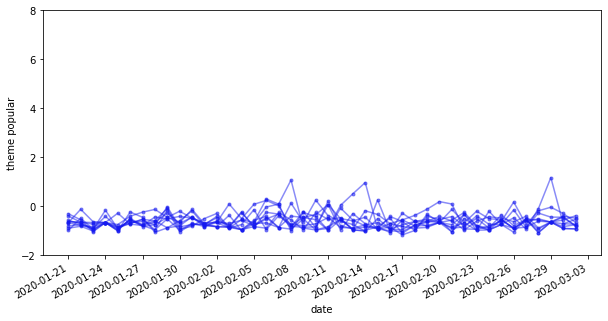

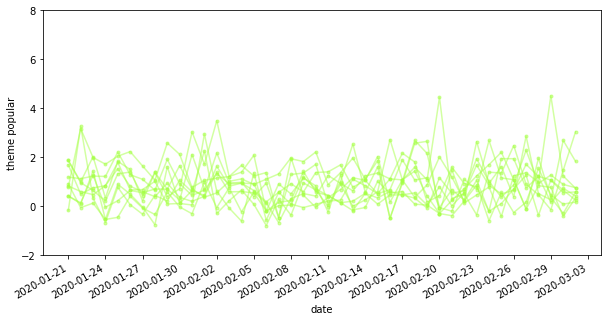

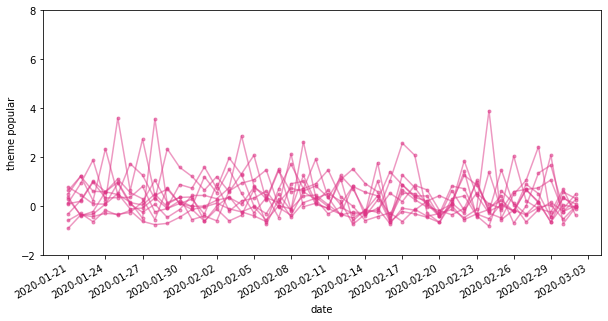

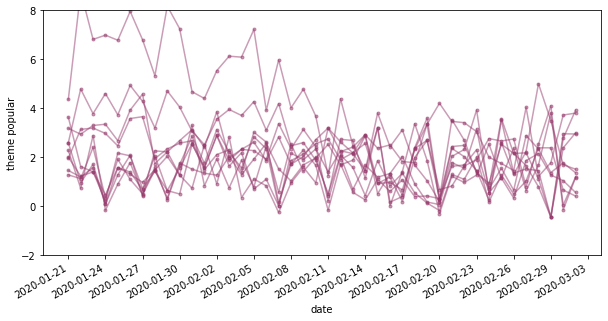

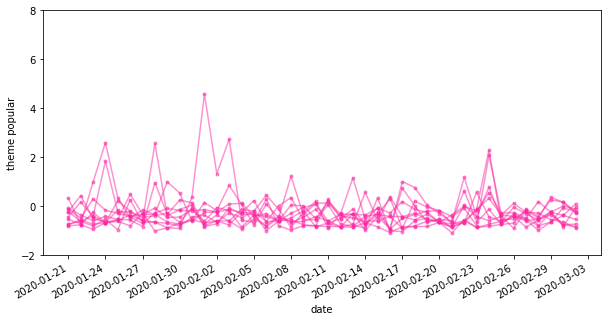

In [739]:
##ÈöèÊú∫ÁîüÊàêÈ¢úËâ≤
import random
def randomcolor():
    colorArr = ['1','2','3','4','5','6','7','8','9','A','B','C','D','E','F']
    color = ""
    for i in range(6):
        color += colorArr[random.randint(0,14)]
    return "#"+color

#ËÆæÂÆöÊó•Êúü
start=datetime.datetime(2020,1,21)
stop=datetime.datetime(2020,3,3)
delta=datetime.timedelta(1)#ËÆæÂÆöÊó•ÊúüÁöÑÈó¥Èöî
dates=mdate.drange(start,stop,delta)
##Âæ™ÁéØÁªòÂõæ
for i,ind in theme_kmeans_5.groupby("kind"):
    index = ind.shape[0]
    length = ind.shape[1]-3
    color = randomcolor()
    fig=plt.figure(figsize=(10,5))#Ë∞ÉÊï¥ÁîªÂõæÁ©∫Èó¥ÁöÑÂ§ßÂ∞è
    for j in range(10):        
        values = ind.iloc[j,0:length]
        plt.plot(dates,values,linestyle='-',marker='.',c=color,alpha=0.5)#‰ΩúÂõæ
        ax=plt.gca()
        ax.set_ylim(-2, 8)
        ax.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))
        ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(3))#ËÆæÂÆöÂùêÊ†áËΩ¥ÁöÑÊòæÁ§∫ÁöÑÂàªÂ∫¶Èó¥Èöî
        fig.autofmt_xdate()#Èò≤Ê≠¢xËΩ¥‰∏äÁöÑÊï∞ÊçÆÈáçÂè†ÔºåËá™Âä®Ë∞ÉÊï¥„ÄÇ  
    plt.xlabel("date")
    plt.ylabel("theme popular")